In [4]:
# TASK CELL
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 
    '''
    review = review[0] if type(review) != str else review
    if type(review) == np.ndarray:
        print(review, review[0])
        review = review[0]
        
    lower_string = review.lower()
    no_url_str = re.sub(r'https?:\/\/\.*','', lower_string)
    clean_str = re.sub(r'[^a-zA-Z]', ' ', no_url_str)  # removing special characters, numbers, punctuations
#     print(clean_str)
    
    stop_words_set = set(stopwords.words('english'))
    stemmer_object = PorterStemmer()  # SnowballStemmer(language='english')
#     lemma_obj = WordNetLemmatizer()
  
    review_str_tokens = word_tokenize(clean_str)
    clean_word_list = [stemmer_object.stem(a_token) for a_token in review_str_tokens if not a_token.lower() in stop_words_set]
    
    clean_review = ' '.join(clean_word_list)
    return clean_review



# Verifying
clean_review('https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html BuckyBarnes@123 \!@#$%^&*\(\)_+=-[]{}\|\';:\"/?.,><`~')

'nlp stanford edu ir book html htmledit stem lemmat html buckybarn'

In [5]:
lines = []

with open(r'S:\MS AI NEU\CS 6120 - NLP\NLP_Project\primes1\primes1.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()
        

In [6]:
lines[0:3]

['                 The First 1,000,000 Primes (from primes.utm.edu)\n',
 '\n',
 '         2         3         5         7        11        13        17        19 \n']

In [7]:
primes_list = [y for x in lines[2:] for y in f"{x.strip()}".split()]

In [8]:
primes_list[:10]

['2', '3', '5', '7', '11', '13', '17', '19', '23', '29']

In [9]:
description = []
genres = []
with open(r'S:\MS AI NEU\CS 6120 - NLP\NLP_Project\Genre Classification Dataset\train_data.txt', 'r', encoding='utf-8') as file2:
    
    for line in file2.readlines():
        _id,title,genre,desc = line.split(' ::: ')
        description.append(f"{desc.lower().strip()}")
        genres.append(f"{genre.lower().strip()}")

In [10]:
description[0]

'listening in to a conversation between his doctor and parents, 10-year-old oscar learns what nobody has the courage to tell him. he only has a few weeks to live. furious, he refuses to speak to anyone except straight-talking rose, the lady in pink he meets on the hospital stairs. as christmas approaches, rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow oscar to live life and love to the full, in the company of his friends pop corn, einstein, bacon and childhood sweetheart peggy blue.'

In [11]:
genres[0]

'drama'

In [12]:
import pandas as pd

df = pd.DataFrame(list(zip(description, genres)), columns =['Description', 'Genre'])

In [13]:
df['Description'] = df['Description'].apply(clean_review)
df

,Description,Genre
0,listen convers doctor parent year old oscar le...,drama
1,brother sister past incestu relationship curre...,thriller
2,bu empti student field trip museum natur histo...,adult
3,help unemploy father make end meet edith twin ...,drama
4,film titl refer un recov bodi ground zero also...,drama
...,...,...
54209,short live nbc live sitcom center bonino world...,comedy
54210,next gener exploit sister kapa bay soror hous ...,horror
54211,ze bestaan echt stand comedi grow face fear fr...,documentary
54212,walter vivian live countri difficult time keep...,comedy


In [14]:
df.to_csv('Train_Data.csv', index=False)

In [15]:
vocab = {x for y in df['Description'] for x in y.strip().split()}

In [19]:
len(vocab)

89311

In [23]:
max([len(x.split()) for x in df['Description']])

1614

In [26]:
primes_list[-5:-1]

['15485837', '15485843', '15485849', '15485857']

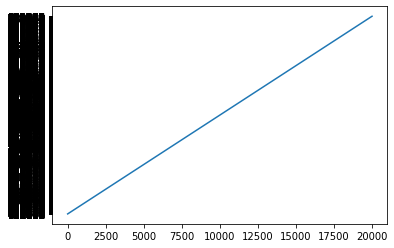

In [37]:
# import matplotlib
# import matplotlib.pyplot as plt

# c = 50000
# k = c+20000

# plt.plot(range(1, len(primes_list[c:k])+1), primes_list[c:k])

In [38]:
description = []
genres = []
with open(r'S:\MS AI NEU\CS 6120 - NLP\NLP_Project\Genre Classification Dataset\test_data_solution.txt', 'r', encoding='utf-8') as file2:
    
    for line in file2.readlines():
        _id,title,genre,desc = line.split(' ::: ')
        description.append(f"{desc.lower().strip()}")
        genres.append(f"{genre.lower().strip()}")

In [39]:
import pandas as pd

df = pd.DataFrame(list(zip(description, genres)), columns =['Description', 'Genre'])

In [40]:
df['Description'] = df['Description'].apply(clean_review)
df

,Description,Genre
0,l r brane love life car apart job especi girlf...,thriller
1,spain march quico naughti child three belong w...,comedy
2,one year life albin famili shepherd north tran...,documentary
3,father die spoken brother year seriou cancer d...,drama
4,known intern martial art superstar bruce lee a...,drama
...,...,...
54195,cover multipl genr tale light dark antholog we...,horror
54196,alic cora munro attempt find father british of...,western
54197,movi year make oliv twist art dodger fagin lov...,adult
54198,popular mysteri rock j mike mallard askew broa...,drama


In [41]:
df.to_csv('Test_Data.csv', index=False)

In [62]:
vector_length = 128

In [63]:
word_value_pool = primes_list[-500000:]

In [64]:
from collections import defaultdict

def zero():
    return 0

word_val_dict = defaultdict(zero)

for word in vocab:
    if word not in word_val_dict:
        word_val_dict[word] = word_value_pool.pop()
    else:
        pass

sentence_vectors = []

for sentence in df['Description']:
    vec = []
    for idx, a_word in enumerate(sentence.strip().split()):
        if idx == vector_length:
            break
        
        vec.append(word_val_dict[a_word])
    
    vec = vec + [0]*(vector_length - len(vec))
    
    sentence_vectors.append(vec)
        

In [65]:
len(sentence_vectors)

54200

In [66]:
sentence_vectors[0]

['14434577',
 '14128237',
 0,
 '14761007',
 '15039329',
 '14386763',
 '14861299',
 '14468473',
 '14577821',
 '14407501',
 '15087739',
 '15165691',
 '14169439',
 '14126261',
 '15087739',
 '15348071',
 '15424397',
 '14434577',
 '14128237',
 '15348071',
 '14350319',
 '14806087',
 '15122773',
 '14207797',
 '15098443',
 '14328143',
 '14382041',
 '14756011',
 '14259331',
 '15087739',
 '14434711',
 '14575849',
 '14066809',
 '15379267',
 '14583097',
 '14434577',
 '14128237',
 '15039329',
 '14975801',
 '14924969',
 '15379267',
 '15165691',
 '14175353',
 '15459809',
 '15368081',
 '14462993',
 '14801461',
 '14487727',
 '14070839',
 '14966837',
 '14928569',
 '15087739',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [84]:
#Numpy deals with large arrays and linear algebra
import numpy as np
# Library for data manipulation and analysis
import pandas as pd 
 
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
 
#Importing the Decision Tree from scikit-learn library
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
 
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [97]:
y = df.Genre
# df.drop(['Genre'], axis=1, inplace=True)
X = sentence_vectors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [102]:
model = GradientBoostingClassifier() # DecisionTreeClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [103]:
# We use the predict() on the model to predict the output
pred = model.predict(X_test)
 
# for classification we use accuracy and F1 score
print(accuracy_score(y_test, pred))
print(f1_score(y_test,pred, average='micro'))  # [None, 'micro', 'macro', 'weighted'].
 
# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# print(mean_absolute_error(y_test,pred))
# print(mean_absolute_error(y_test,pred))

0.27586715867158673
0.27586715867158673
